# Detector response for TQ 2/12/2019 Xinchun Hu

In [1]:
import numpy as np
import bilby
from sympy import sin,cos,log,sqrt
from astropy import constants as const
import matplotlib.pyplot as plt

OrbitRadiusInS = 1e8 /const.c.value    # 1e5 km
MearthInS      = const.M_earth.value*const.G.value/const.c.value**3
OrbitPeriodInS = 2*np.pi*np.sqrt(OrbitRadiusInS**3/MearthInS)
YearInS  = 31536000.0   # one year in [s]

# Waveform generation Using IMRPhenomPv2

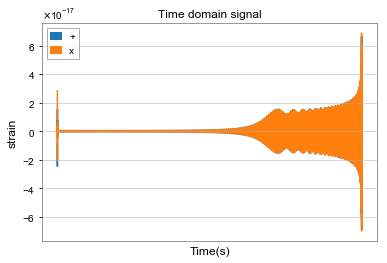

In [2]:
injection_parameters = dict(
    mass_1=3.6e6, mass_2=2.9e6, a_1=0.4, a_2=0.3, tilt_1=0.0, tilt_2=0.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=1000, theta_jn=0.4, psi=0.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

duration = 1638400      # waveform duration 
sampling_frequency = 2.0e-2   # fmax = 1.0e-2

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=1.0e-4,
                          minimum_frequency=1.0e-4)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    start_time=injection_parameters['geocent_time'] - duration)


freq = waveform_generator.frequency_array
hplus_fre = waveform_generator.frequency_domain_strain(injection_parameters)['plus']
hcros_fre = waveform_generator.frequency_domain_strain(injection_parameters)['cross']


time = waveform_generator.time_array
hplus = waveform_generator.time_domain_strain(injection_parameters)['plus']
hcros = waveform_generator.time_domain_strain(injection_parameters)['cross']

plt.plot(time, hplus,label='+')
plt.plot(time, hcros,label='x')
plt.xlabel('Time(s)')
plt.ylabel('strain')
plt.title('Time domain signal')
plt.legend()
plt.xscale('log')
# plt.savefig('LISA_IMRPhenomPv2_waveform.png', dpi=200)

In [3]:
print(hplus[0:30])

[-9.19089447e-18 -2.46321145e-17 -1.83125444e-17  5.79734679e-19
  1.52031998e-17  1.53977919e-17  4.09711491e-18 -7.62094980e-18
 -1.07302121e-17 -4.73780953e-18  3.76663079e-18  7.69777063e-18
  5.02694676e-18 -7.61379825e-19 -4.55422979e-18 -3.89188258e-18
 -2.71236346e-19  2.87220477e-18  3.22593513e-18  1.12391344e-18
 -1.29716784e-18 -2.13084336e-18 -1.10305883e-18  5.81911833e-19
  1.48798204e-18  1.09205806e-18 -2.48625299e-20 -8.67913335e-19
 -8.73606250e-19 -2.37710848e-19]


No handles with labels found to put in legend.


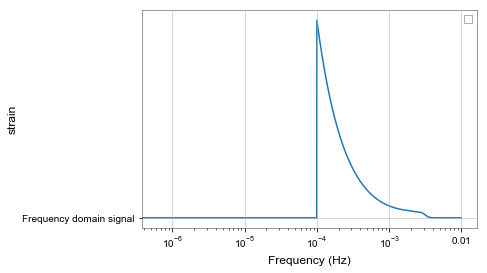

In [4]:
plt.plot(freq, abs(hplus_fre+hcros_fre))
plt.xlabel('Frequency (Hz)')
plt.ylabel('strain')
plt.xscale('log')
plt.plot('Frequency domain signal')
plt.legend()
plt.xscale('log')
# plt.savefig('LISA_IMRPhenomPv2_waveform.png', dpi=200)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


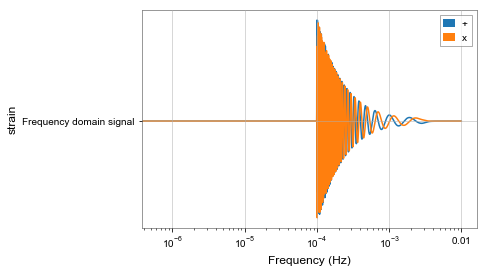

In [5]:
plt.plot(freq, hplus_fre,label='+')
plt.plot(freq, hcros_fre,label='x')
plt.xlabel('Frequency (Hz)')
plt.ylabel('strain')
plt.xscale('log')
plt.plot('Frequency domain signal')
plt.legend()
plt.xscale('log')

# Antenna pattern function of TQ

In [38]:
thetaS = np.pi/6
phiS = np.pi/0.9
psi = np.pi/2.5

In [39]:
def Dplus_TQ(t,thetaS,phiS):
    """For TianQin (one Michelson interferometer): (thetaS,phiS) is location of source,
    (thJ,phJ) is latitude and longitude of J0806 in heliocentric-ecliptic frame"""
    thJ  = 1.65273
    phJ  = 2.10213
    kap = 2*np.pi/OrbitPeriodInS*t
#    kap = 2*np.pi/YearInS* t(f,theta)
    return np.sqrt(3.)/32*(8*cos(2*kap) *((3 + cos(2*thetaS)) *sin(2*(phiS - phJ))*  
            cos(thJ) + 2*sin(thJ) *sin(phiS - phJ)*sin(2*thetaS))- 2*sin(2*kap)* (3 +               
            cos(2*(phiS - phJ))*(9 + cos(2*thetaS)*(3 + cos(2*thJ))) -6 *cos(2*thJ)*(sin(phiS - phJ))**2 -               
            6* cos(2*thetaS)*(sin(thJ))**2 + 4*cos(phiS - phJ)*sin(2*thJ)*sin(2*thetaS))) 

def Dcros_TQ(t,thetaS,phiS):
    """For TianQin (one Michelson interferometer): (thetaS,phiS) is location of source, 
    (thJ,phJ) is latitude and longitude of J0806 in heliocentric-ecliptic frame"""
    thJ  = 1.65273
    phJ  = 2.10213
    kap = 2*np.pi/OrbitPeriodInS*t
#    kap = 2*np.pi/YearInS* t(f,theta)
    return np.sqrt(3.)/4*(-4*cos(2*kap)*(cos(2*(phiS-phJ))*cos(thJ)*cos(thetaS)+                 
            cos(phiS-phJ)*sin(thetaS)*sin(thJ))+sin(2*kap)*(cos(thetaS)*(3+cos(2*thJ))*sin(2*(phJ-phiS))+                
            2*sin(phJ-phiS)*sin(thetaS)*sin(2*thJ)))

def Fplus_TQ(t,thetaS,phiS,psi):
    """antenna pattern function for '+' mode"""
    return (cos(2*psi)*Dplus_TQ(t,thetaS,phiS)-sin(2*psi)*Dcros_TQ(t,thetaS,phiS))/2.

def Fcros_TQ(t,thetaS,phiS,psi):
    """antenna pattern function for '×' mode"""
    return (sin(2*psi)*Dplus_TQ(t,thetaS,phiS)+cos(2*psi)*Dcros_TQ(t,thetaS,phiS))/2.



Text(0.5, 1.0, 'TianQin Antenna pattern function')

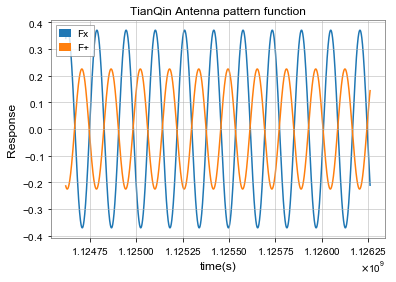

In [43]:
Dplus = []
Dcros = []
Fplus = []
Fcros = []

for i in time:
    Dp = Dplus_TQ(i,thetaS,phiS)
    Dc = Dcros_TQ(i,thetaS,phiS)
    Fp = Fplus_TQ(i,thetaS,phiS,psi)
    Fc = Fcros_TQ(i,thetaS,phiS,psi)
    Dplus.append(Dp)
    Dcros.append(Dc)
    Fplus.append(Fp)
    Fcros.append(Fc)

Dplus = np.array(Dplus)         #Convert list to array
Dcros = np.array(Dcros)         #Convert list to array
Fplus = np.array(Fplus)         #Convert list to array
Fcros = np.array(Fcros)         #Convert list to array


# fig = plt.plot(time, Dplus, label='D+')
# fig = plt.plot(time, Dcros, label='Dx')
# plt.xlabel('time(s)')
# plt.ylabel('Transfer')
# plt.legend()
# plt.title('TianQin Transfer function')

fig = plt.plot(time, Fcros, label='Fx')
fig = plt.plot(time, Fplus, label='F+')
plt.xlabel('time(s)')
plt.ylabel('Response')
plt.legend()
plt.title('TianQin Antenna pattern function')

In [8]:
print(time[100]-time[99])
print(len(Fplus))

50.0
32768


# Signal detected by detector h = (F_+ h_+) + (F_x h_x)

Text(0.5, 1.0, 'IMRPhenomPv2 detected by TianQin')

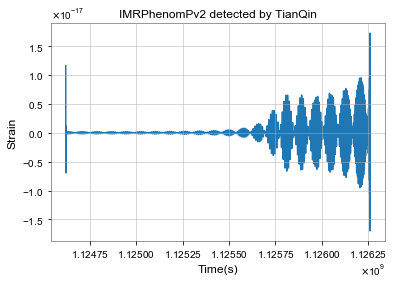

In [9]:
strain = Fplus*hplus + Fcros*hcros

plt.plot(time, strain, label='strain')
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.title('IMRPhenomPv2 detected by TianQin')

Text(0.5, 1.0, 'TQ sensitivity not consider antenna pattern function effects')

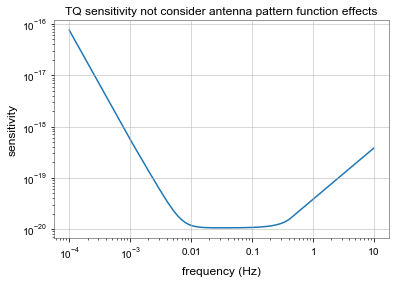

In [10]:
def R_TQ(f):
    """transfer function of TianQin"""
    f_star = 0.28
    if f < 3./2*f_star:
        R = 3./10*(1-169./504*(f/f_star)**2+425./9072*(f/f_star)**4-165073./47900160*(f/f_star)**6)
    else:
        R = 16783143./126156800*(3*f_star/2/f)**2
    return R
# R_TQ.__doc__

def TQsqrtPSD(f):
    """CQG 2018"""
    Sx = 1e-24
    Sa = 1e-30
    L0 = sqrt(3.)*1e5 *1e3
    return sqrt(Sx/(L0**2)+ 4*Sa/((2*np.pi*f)**4*L0**2)*(1.+ 1e-4/f))

def TQ_Sensitivity(f):
    return TQsqrtPSD(f)/sqrt(R_TQ(f))

f = []
sensitivity = []
for i in np.linspace(1.0e-4,1.0e1,10000):
    sen = TQ_Sensitivity(i)
    f.append(i)
    sensitivity.append(sen)

plt.plot(f,sensitivity)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('sensitivity')
plt.title('TQ sensitivity not consider antenna pattern function effects')

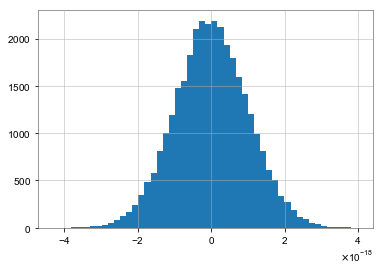

In [24]:
N = len(time)
mean = 0
sigma = 1.0e-18
noise   = sigma*np.random.randn(N)

plt.hist(noise,50)
plt.show()

# Inject detector signal into noise (time domain)

In [12]:
data_time = strain + noise

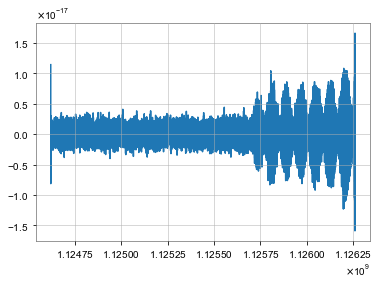

In [13]:
plt.plot(time, data_time)

# SNR calculate

In [14]:
power_spectrum_density = 2*sigma**2*50
hf = hplus_fre + hcros_fre
snr = np.sqrt(np.real(np.trapz(abs(hf)**2/power_spectrum_density, freq)))

print(snr)

907.6076570725824


# Likelihood establish

In [15]:
def create_frequency_series(sampling_frequency, duration):
    """ Create a frequency series with the correct length and spacing.

    Returns
    -------
    array_like: frequency series

    """
#     _check_legal_sampling_frequency_and_duration(sampling_frequency, duration)
    number_of_samples = int(np.round(duration * sampling_frequency))
    number_of_frequencies = int(np.round(number_of_samples / 2) + 1)

    return np.linspace(start=0,
                       stop=sampling_frequency / 2,
                       num=number_of_frequencies)

Text(0.5, 1.0, 'fd data')

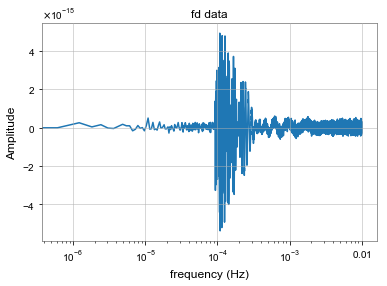

In [16]:
data_fd = np.fft.fft(data_time)
data_fd = data_fd[0:int((len(data_fd))/2+1)]
ff = create_frequency_series(2.0e-2, 1638400)

plt.plot(ff, data_fd)
plt.xscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('fd data')

In [30]:
# noise_power_spectrum_density = 2*sigma**2*50  #approximate

noise_power_spectral_density = np.fft.fft(noise)*np.transpose(np.conjugate(np.fft.fft(noise)))/duration
noise_power_spectral_density = noise_power_spectral_density[0:int((len(noise_power_spectral_density))/2+1)]
hf = hplus_fre + hcros_fre
snr = np.sqrt(np.real(np.trapz(abs(hf)**2/noise_power_spectral_density, freq)))

print(snr)
# print(len(data_fd))
# print(len(hf))
# print(len(noise_power_spectral_density))

140984.35013456424
16385
16385
16385


In [31]:
def noise_weighted_inner_product(aa, bb, power_spectral_density, duration):
    """
    Calculate the noise weighted inner product between two arrays.
    
    Returns
    ------
    Noise-weighted inner product.
    """

    integrand = np.conj(aa) * bb / power_spectral_density
    return 4 / duration * np.sum(integrand)

def log_likelihood(duration, data_fd, hf, noise_power_spectral_density):
    """
    Returns
    ------
    float: The real part of the log-likelihood for this interferometer
    """
    
    log_l = - 2. / duration * np.vdot(data_fd - hf,(data_fd - hf) /noise_power_spectral_density)
    return log_l.real

In [32]:
Loglikelihood = log_likelihood(duration, data_fd, hf, noise_power_spectral_density)
print(Loglikelihood)

-39697672403.792336
